In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [14]:
n_pts=500
centers=[[-1,1],[-1,-1],[1,-1],[1,1],[0,0]]
X,y=datasets.make_blobs(n_samples=n_pts,random_state=123,centers=centers,cluster_std=0.4)

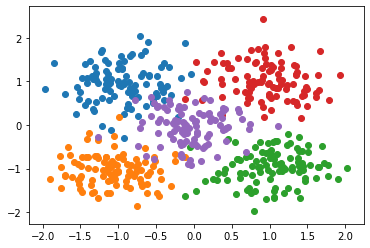

In [15]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

In [16]:
y_cat=to_categorical(y,5)
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [17]:
model=Sequential()
model.add(Dense(units=5,input_shape=(2,),activation='softmax'))
model.compile(Adam(lr=0.1),loss='categorical_crossentropy',metrics=['accuracy'])


In [18]:
model.fit(x=X,y=y_cat,verbose=1,batch_size=50,epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 174us/step - loss: 1.1347 - accuracy: 0.5020
Epoch 2/100
500/500 [==============================] - 0s 34us/step - loss: 0.5851 - accuracy: 0.8200
Epoch 3/100
500/500 [==============================] - 0s 36us/step - loss: 0.4015 - accuracy: 0.9180
Epoch 4/100
500/500 [==============================] - 0s 39us/step - loss: 0.3210 - accuracy: 0.9420
Epoch 5/100
500/500 [==============================] - 0s 42us/step - loss: 0.2817 - accuracy: 0.9360
Epoch 6/100
500/500 [==============================] - 0s 40us/step - loss: 0.2559 - accuracy: 0.9420
Epoch 7/100
500/500 [==============================] - 0s 38us/step - loss: 0.2390 - accuracy: 0.9520
Epoch 8/100
500/500 [==============================] - 0s 40us/step - loss: 0.2267 - accuracy: 0.9460
Epoch 9/100
500/500 [==============================] - 0s 42us/step - loss: 0.2174 - accuracy: 0.9500
Epoch 10/100
500/500 [==============================] - 0s 40us/step - loss: 0.20

In [19]:
def plot_decision_boundary(X,y_cat,model):
    x_span=np.linspace(min(X[:,0])-1,max(X[:,0])+1)
    y_span=np.linspace(min(X[:,1])-1,max(X[:,1])+1)
    xx,yy=np.meshgrid(x_span,y_span)
    xx_,yy_=xx.ravel(),yy.ravel()
    grid=np.c_[xx_,yy_]
    pred_func=model.predict_classes(grid)
    z=pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

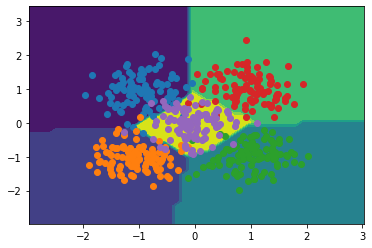

In [20]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

Prediction is [3]


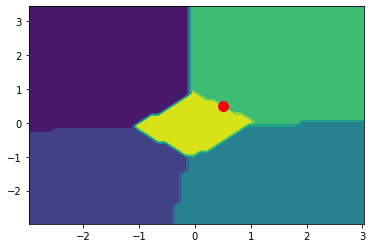

In [24]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])
x=0.5
y=0.5
point=np.array([[x,y]])
Prediction=model.predict_classes(point)
plt.plot([x],[y],marker='o',markersize='10',color="red")
print('Prediction is',Prediction)
